# Загрузка и подготовка данных для подачи в нейронную сеть

In [8]:
from google.colab import drive
drive.mount('/content/drive')
! pip install Augmentor
import Augmentor
import zipfile
import os
import numpy as np
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Строим график точности на проверочной выборке
import matplotlib.pyplot as plt
# Утилиты предобработки данных
from keras import  utils
# устанавливаем Autokeras
!pip install autokeras
import autokeras as ak
from PIL import Image                     # Отрисовка изображений
import random                             # Генерация случайных чисел 
import matplotlib.pyplot as plt           # Отрисовка графиков

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 111.0 MB/s eta 0:00:00


#Аугментация изображений для получения больше картинок для обучения нейронной сети

In [ ]:
# Указываем путь к архиву и название папки, в которую нужно распаковать
zip_path = "/content/drive/MyDrive/Iris_ID_изм.zip"
dir_path = "Iris"

# Распаковываем архив
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dir_path)
'''
    Код сначала распакует архив в папку "Iris", затем для каждой подпапки в этой 
    папке создаст генератор аугментации и применит к нему набор аугментационных 
    операций, сохраняя измененные изображения в подпапку с суффиксом "_augmented".
    В каждой папке содержится по 6 изображений
'''

# Применяем аугментацию к каждой папке с изображениями
for folder in os.listdir(dir_path):
    if os.path.isdir(os.path.join(dir_path, folder)):
        # Создаем генератор аугментации для каждой папки
        p = Augmentor.Pipeline(os.path.join(dir_path, folder), output_directory=os.path.join('/content/drive/MyDrive/Iris'))
        # Добавляем операции аугментации
        # Вращение изображения
        p.rotate(probability=0.2, max_left_rotation=5, max_right_rotation=5)
        # увеличение
        #p.zoom(probability=0.2, min_factor=1.1, max_factor=1.2)
        # Обрезание изображения
        p.crop_random(probability=0.1, percentage_area=0.2)
        # Изменение яркости
        p.random_brightness(probability=0.5, min_factor=0.5, max_factor=1.2)
        # Изменение сонтрасности
        p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.2)
        # Применяем аугментацию
        p.sample(3000)
        print('Аугментация завершена')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Initialised with 383 image(s) found.
Output directory set to /content/drive/MyDrive/Iris.

Processing <PIL.Image.Image image mode=RGB size=153x115 at 0x7F3358263340>: 100%|██████████| 3000/3000 [08:48<00:00,  5.68 Samples/s]

Аугментация завершена


# Архивируем данные после проверки визуально, что насоздавала аугментация


In [6]:
def create_archive(folder_path, archive_path):
    """Функция для создания архива папки"""
    with zipfile.ZipFile(archive_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file))

# Путь до папки с результатами
folder_path = '/content/drive/MyDrive/Iris'

# Путь до создаваемого архива
archive_path = '/content/drive/MyDrive/Iris.zip'

# Создание архива
create_archive(folder_path, archive_path)

In [7]:
# Эта команда распакует архив в папку `/content/Iris/`
!unzip /content/drive/MyDrive/Iris.zip -d /content/
IMAGE_PATH = '/content/content/drive/MyDrive/Iris'

Archive:  /content/drive/MyDrive/Iris.zip
  inflating: /content/content/drive/MyDrive/Iris/1/1_original_001R_1.png_d115ed81-e149-4333-9b5a-708e731bc04a.png  
  inflating: /content/content/drive/MyDrive/Iris/1/1_original_001R_2.png_94896711-e7c9-4f62-a711-9198427ade94.png  
  inflating: /content/content/drive/MyDrive/Iris/1/1_original_001R_1.png_8a192cbd-1208-4d5b-ad77-820672c64747.png  
  inflating: /content/content/drive/MyDrive/Iris/1/1_original_001R_1.png_764a7f55-4507-4bbd-a956-baac37009ecd.png  
  inflating: /content/content/drive/MyDrive/Iris/1/1_original_001R_3.png_70ec3eb0-e1f5-44c0-9c5c-3d4f39d6ee54.png  
  inflating: /content/content/drive/MyDrive/Iris/1/1_original_001L_2.png_ef910a5e-8ed4-4e90-b2d0-f6582db4f107.png  
  inflating: /content/content/drive/MyDrive/Iris/1/1_original_001L_3.png_a2525d6f-9002-49c2-99d1-3ea9aed58bd7.png  
  inflating: /content/content/drive/MyDrive/Iris/1/1_original_001R_3.png_54e63574-f140-4f7a-bdfd-a559b53130cf.png  
  inflating: /content/content/

Теперь вы можете увидеть, что находится в загруженной базе. Для этого функцией `listdir()` из модуля **os** получите список папок по адресу **IMAGE_PATH**:

In [8]:
# Получите список папок
os.listdir(IMAGE_PATH)

['21',
 '37',
 '10',
 '24',
 '20',
 '42',
 '48',
 '52',
 '13',
 '2',
 '23',
 '30',
 '55',
 '62',
 '14',
 '17',
 '57',
 '46',
 '6',
 '19',
 '60',
 '7',
 '35',
 '59',
 '56',
 '51',
 '40',
 '47',
 '25',
 '32',
 '11',
 '36',
 '22',
 '49',
 '18',
 '9',
 '1',
 '15',
 '27',
 '53',
 '44',
 '61',
 '4',
 '38',
 '45',
 '34',
 '29',
 '16',
 '8',
 '12',
 '50',
 '33',
 '41',
 '28',
 '64',
 '54',
 '31',
 '3',
 '43',
 '5',
 '63',
 '26',
 '58',
 '39']

Здесь видно, что файлы распределены по папкам, при этом названия папок соответствуют именам классов (маркам авто). Поэтому зададим список классов из списка папок. Функция `listdir()` возвращает список папок в неопределенном порядке, поэтому список классов желательно отсортировать, чтобы имена классов всегда шли в одном порядке. Метками классов будут индексы имен классов в списке классов. Количество классов определим как длину списка классов.

In [9]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 64, метки классов: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


In [10]:
i = 0

# Формирование пути к выборке одной марки авто
f'{IMAGE_PATH}{CLASS_LIST[i]}/'

'/content/content/drive/MyDrive/Iris1/'

Отобразим визуально для примера по одному изображению из каждого класса (при помощи функции `imshow()` из модуля **matplotlib.pyplot**).

Для этого импортируем необходимые библиотеки, создадим заготовку для изображений всех классов.

Далее в цикле переберем все классы. Сформируем путь к классу, выберем из него один случайный экземпляр (при помощи функции `random.choice()`) и отобразим его в ячейке (получим содержимое картинки при помощи функции `open()` из модуля **Image**).

In [12]:
data_dir = "/content/drive/MyDrive/Iris/"

# Получение списка папок в каталоге
folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Показ по одной фотографии из каждой папки
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    image_names = [name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))]
    if len(image_names) > 0:
        first_image_path = os.path.join(folder_path, image_names[0])
        image = Image.open(first_image_path)
        image.show()

Output hidden; open in https://colab.research.google.com to view.

# Изображения

Для выполнения задачи нужно выполнить следующие шаги:

Импортировать модуль os для работы с файловой системой.
Создать два пустых списка: один для хранения путей к файлам изображений, а другой для хранения меток классов (названий папок).
Получить список папок, содержащихся в директории 'construction'.
Для каждой папки пройтись по всем файлам внутри нее и добавить путь к файлу в первый список, а метку (название категории) во второй список.
Вывести на экран количество изображений в каждой папке и имя папки.
Вот код для выполнения всех этих шагов:

In [13]:
import os

# Создаем пустые списки для хранения путей к файлам изображений и меток классов
image_paths = []
labels = []

# Получаем список папок, содержащихся в директории '/Iris/'
dir_path = "/content/drive/MyDrive/Iris/"
categories = os.listdir(dir_path)

# Проходим по каждой папке и добавляем в списки путь к файлу изображения и метку класса
for category in categories:
    category_path = os.path.join(dir_path, category)
    if os.path.isdir(category_path):
        files = os.listdir(category_path)
        print(f"Number of images in '{category}': {len(files)}")
        for file_name in files:
            file_path = os.path.join(category_path, file_name)
            image_paths.append(file_path)
            labels.append(category)

# Выводим результаты
print("Total number of images:", len(image_paths))
print("Total number of labels:", len(labels))


Number of images in '1': 38
Number of images in '10': 32
Number of images in '11': 47
Number of images in '12': 37
Number of images in '13': 41
Number of images in '14': 45
Number of images in '15': 36
Number of images in '16': 41
Number of images in '17': 46
Number of images in '18': 30
Number of images in '19': 43
Number of images in '2': 33
Number of images in '20': 44
Number of images in '21': 40
Number of images in '22': 38
Number of images in '23': 38
Number of images in '24': 42
Number of images in '25': 41
Number of images in '26': 51
Number of images in '27': 42
Number of images in '28': 39
Number of images in '29': 44
Number of images in '3': 39
Number of images in '30': 48
Number of images in '31': 37
Number of images in '32': 42
Number of images in '33': 43
Number of images in '34': 48
Number of images in '35': 34
Number of images in '36': 45
Number of images in '37': 49
Number of images in '38': 29
Number of images in '39': 34
Number of images in '4': 45
Number of images i

In [14]:

# Создаем экземпляр LabelEncoder и преобразуем лейблы в числовой формат
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Создаем экземпляр OneHotEncoder и преобразуем числовые значения в One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Выводим результат
print(onehot_encoded)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Этот код сначала создает экземпляр LabelEncoder, который преобразует лейблы в числовой формат. Затем создается экземпляр OneHotEncoder, который преобразует числовые значения в формат One-Hot Encoding. Наконец, преобразованные данные выводятся на экран.

In [15]:
onehot_encoded[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Для выполнения задачи нужно выполнить следующие шаги:

Импортировать модули numpy и Image из библиотеки Pillow.
Создать пустой список для изображений.
Пройтись по списку image_paths, открыв каждое изображение, приведя его к формату 64 на 64 пикселя и добавив его в пустой список в виде numpy массива.
После окончания всех итераций, перевести созданный список в формат numpy массива.
Cписок меток классов  перевести в формат numpy массива.
Вот код для выполнения всех этих шагов:

In [16]:
# Создаем пустой список для изображений
images128 = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in image_paths:
    with Image.open(path) as img:
        img = img.resize((128, 128)) # изменяем размер изображения до 64x64 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        images128.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
images128 = np.array(images128)

# Преобразуем список меток классов в формат numpy массива

labels_onehot128 = np.array(onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of images array:", images128.shape)
print("Shape of labels array:", labels_onehot128.shape)

images64 = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in image_paths:
    with Image.open(path) as img:
        img = img.resize((64, 64)) # изменяем размер изображения до 64x64 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        images64.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
images64 = np.array(images64)

# Преобразуем список меток классов в формат numpy массива

labels_onehot64 = np.array(onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of images array:", images64.shape)
print("Shape of labels array:", labels_onehot64.shape)


Shape of images array: (2564, 128, 128, 3)
Shape of labels array: (2564, 64)
Shape of images array: (2564, 64, 64, 3)
Shape of labels array: (2564, 64)


In [17]:


# Нормируем массив изображений
images_normalized64 = images64 / 255.0

# Выводим результат
print(images_normalized64[0])

# Нормируем массив изображений
images_normalized128 = images128 / 255.0

# Выводим результат
print(images_normalized128[0])

[[[0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  ...
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]]

 [[0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  ...
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]]

 [[0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  ...
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]]

 ...

 [[0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  ...
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]]

 [[0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]


In [24]:

# Разделяем данные на тренировочную и тестовую выборки
X_Train128, X_val128, y_Train128, y_val128 = train_test_split(images128, labels_onehot128, test_size=0.2, random_state=42)
X_train128, X_test128, y_train128, y_test128 = train_test_split(X_Train128, y_Train128, test_size=0.2, random_state=42)
# Выводим размеры тренировочной и тестовой выборок
print("X_train128 shape:", X_train128.shape)
print("y_train128 shape:", y_train128.shape)
print("X_val128 shape:", X_val128.shape)
print("y_val128 shape:", y_val128.shape)
print("X_test128 shape:", X_test128.shape)
print("y_test128 shape:", y_test128.shape)


X_train128 shape: (1640, 128, 128, 3)
y_train128 shape: (1640, 64)
X_val128 shape: (513, 128, 128, 3)
y_val128 shape: (513, 64)
X_test128 shape: (411, 128, 128, 3)
y_test128 shape: (411, 64)


In [25]:
# Разделяем данные на тренировочную и тестовую выборки
X_Train64, X_val64, y_Train64, y_val64 = train_test_split(images64, labels_onehot64, test_size=0.2, random_state=42)
X_train64, X_test64, y_train64, y_test64 = train_test_split(X_Train64, y_Train64, test_size=0.2, random_state=42)
# Выводим размеры тренировочной и тестовой выборок
print("X_train shape:", X_train64.shape)
print("y_train shape:", y_train64.shape)
print("X_val shape:", X_val64.shape)
print("y_val shape:", y_val64.shape)
print("X_test shape:", X_test64.shape)
print("y_test shape:", y_test64.shape)


X_train shape: (1640, 64, 64, 3)
y_train shape: (1640, 64)
X_val shape: (513, 64, 64, 3)
y_val shape: (513, 64)
X_test shape: (411, 64, 64, 3)
y_test shape: (411, 64)


# Cохранение и дальнейшая загрузка данных для создания нейронных сетей 

In [26]:
np.save('/content/drive/MyDrive/Colab Notebooks/X_train128'    , X_train128)
np.save('/content/drive/MyDrive/Colab Notebooks/y_train128'    , y_train128)
np.save('/content/drive/MyDrive/Colab Notebooks/X_val128'      , X_val128)
np.save('/content/drive/MyDrive/Colab Notebooks/y_val128'      , y_val128)
np.save('/content/drive/MyDrive/Colab Notebooks/X_test128'     , X_test128)
np.save('/content/drive/MyDrive/Colab Notebooks/y_test128'     , y_test128)

np.save('/content/drive/MyDrive/Colab Notebooks/X_train64'    , X_train64)
np.save('/content/drive/MyDrive/Colab Notebooks/y_train64'    , y_train64)
np.save('/content/drive/MyDrive/Colab Notebooks/X_val64'      , X_val64)
np.save('/content/drive/MyDrive/Colab Notebooks/y_val64'      , y_val64)
np.save('/content/drive/MyDrive/Colab Notebooks/X_test64'     , X_test64)
np.save('/content/drive/MyDrive/Colab Notebooks/y_test64'     , y_test64)

In [21]:
print("X_train shape:", X_train64.shape)
print("y_train shape:", y_train64.shape)
print("X_val shape:", X_val64.shape)
print("y_val shape:", y_val64.shape)
print("X_test shape:", X_test64.shape)
print("y_test shape:", y_test64.shape)

X_train shape: (1640, 64, 64, 3)
y_train shape: (1640, 64, 64, 3)
X_val shape: (513, 64, 64, 3)
y_val shape: (513, 64)
X_test shape: (411, 64, 64, 3)
y_test shape: (411, 64, 64, 3)


In [4]:
X_train128 =             np.load('/content/drive/MyDrive/Colab Notebooks/X_train128.npy')
y_train128 =             np.load('/content/drive/MyDrive/Colab Notebooks/y_train128.npy')
X_val128   =             np.load('/content/drive/MyDrive/Colab Notebooks/X_val128.npy')
y_val128   =             np.load('/content/drive/MyDrive/Colab Notebooks/y_val128.npy')
X_test128  =             np.load('/content/drive/MyDrive/Colab Notebooks/X_test128.npy')
y_test128  =             np.load('/content/drive/MyDrive/Colab Notebooks/y_test128.npy')

X_train64  =             np.load('/content/drive/MyDrive/Colab Notebooks/X_train64.npy')
y_train64  =             np.load('/content/drive/MyDrive/Colab Notebooks/y_train64.npy')
X_val64    =             np.load('/content/drive/MyDrive/Colab Notebooks/X_val64.npy')
y_val64    =             np.load('/content/drive/MyDrive/Colab Notebooks/y_val64.npy')
X_test64   =             np.load('/content/drive/MyDrive/Colab Notebooks/X_test64.npy')
y_test64   =             np.load('/content/drive/MyDrive/Colab Notebooks/y_test64.npy')

Epoch 1/20
52/52 [==============================] - 3s 20ms/step - loss: 19.7223 - accuracy: 0.0159 - val_loss: 4.1594 - val_accuracy: 0.0195
Epoch 2/20
52/52 [==============================] - 1s 16ms/step - loss: 4.1573 - accuracy: 0.0238 - val_loss: 4.1606 - val_accuracy: 0.0117
Epoch 3/20
52/52 [==============================] - 1s 16ms/step - loss: 4.1495 - accuracy: 0.0232 - val_loss: 4.1608 - val_accuracy: 0.0175
Epoch 4/20
52/52 [==============================] - 1s 17ms/step - loss: 4.1293 - accuracy: 0.0256 - val_loss: 4.1379 - val_accuracy: 0.0156
Epoch 5/20
52/52 [==============================] - 1s 16ms/step - loss: 3.8312 - accuracy: 0.0963 - val_loss: 3.6113 - val_accuracy: 0.1793
Epoch 6/20
52/52 [==============================] - 1s 18ms/step - loss: 2.7993 - accuracy: 0.3207 - val_loss: 2.3818 - val_accuracy: 0.4016
Epoch 7/20
52/52 [==============================] - 1s 19ms/step - loss: 1.5701 - accuracy: 0.5823 - val_loss: 1.8419 - val_accuracy: 0.5673
Epoch 8/20
5

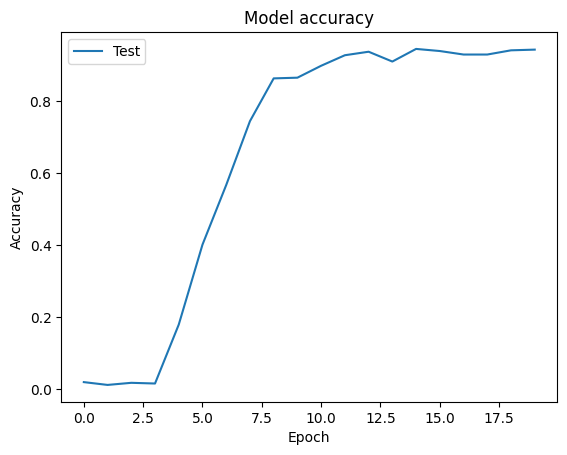

In [30]:

# Создаем модель нейронной сети
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='softmax'))

# Компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель на тренировочной выборке
history = model.fit(X_train128, y_train128, epochs=20, validation_data=(X_val128, y_val128))

# Строим график точности на проверочной выборке
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()


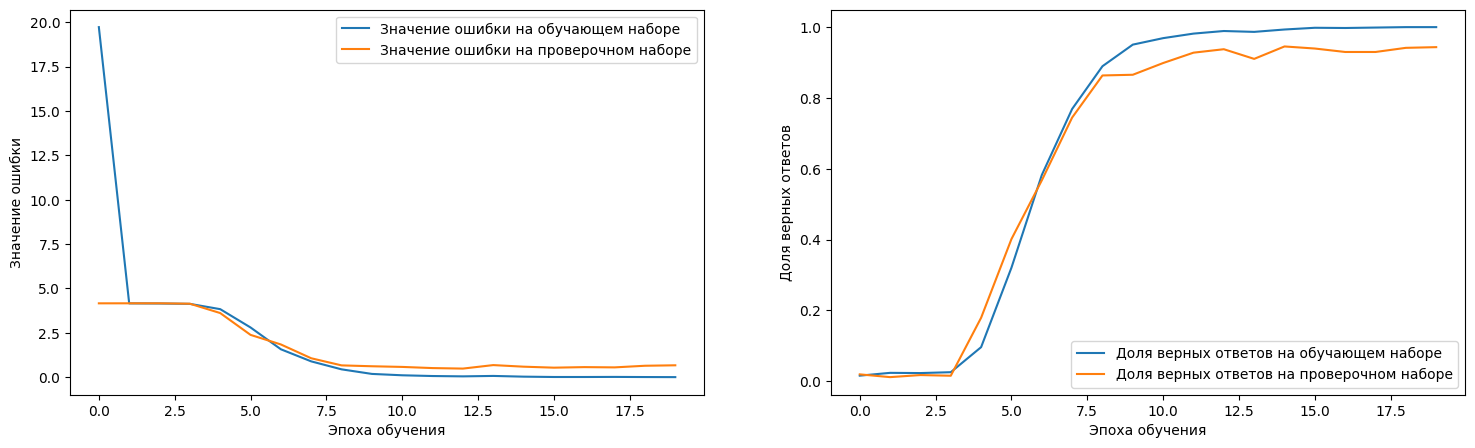

In [31]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря history.history
plt.plot(history.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря history.history
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [32]:
# Оценка точности модели на проверочной выборке
accuracy = model.evaluate(X_test128, y_test128)[1]
print("Accuracy on validation data:", accuracy)

13/13 [==============================] - 0s 22ms/step - loss: 0.5712 - accuracy: 0.9367
Accuracy on validation data: 0.9367396831512451


In [ ]:

# Создаем модель нейронной сети
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='softmax'))

# Компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель на тренировочной выборке
history = model.fit(X_train64, y_train64, epochs=20, validation_data=(X_val64, y_val64))

# Вывод модели 
utils.plot_model(model.fit, dpi=60)


plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()


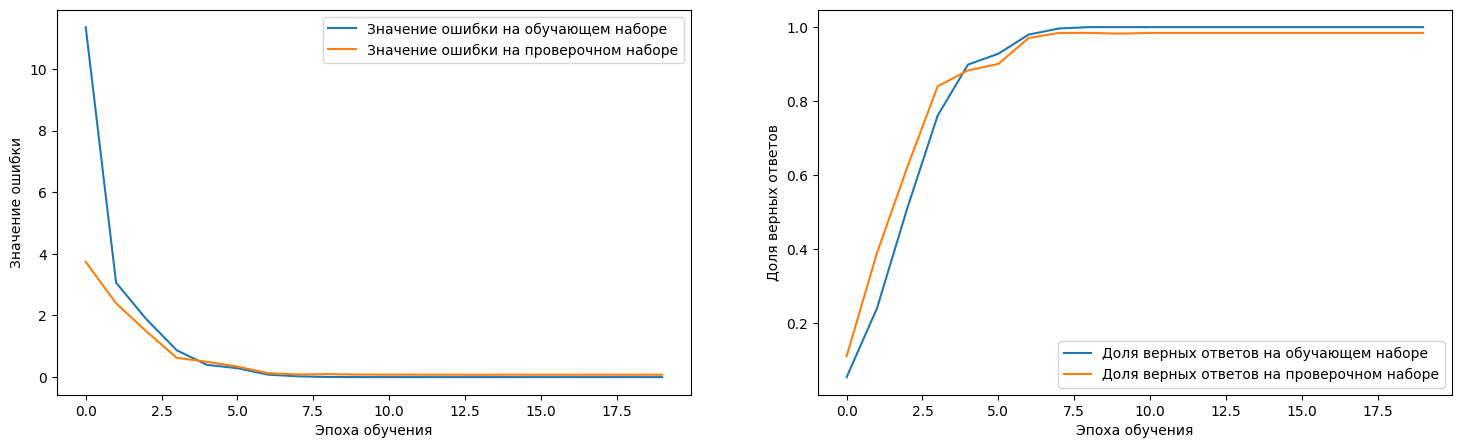

In [34]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря history.history
plt.plot(history.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря history.history
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [35]:
# Оценка точности модели на проверочной выборке
accuracy = model.evaluate(X_test64, y_test64)[1]
print("Accuracy on validation data:", accuracy)

13/13 [==============================] - 0s 17ms/step - loss: 0.0600 - accuracy: 0.9805
Accuracy on validation data: 0.9805352687835693


In [13]:


# Инициализация классификатора AutoKeras
clf = ak.ImageClassifier(
    max_trials=2,
    objective='val_accuracy',
    directory='pavement_crack',
    overwrite=True)

clf.fit(X_train64, y_train64, epochs=8, validation_data=(X_val64, y_val64))

Trial 2 Complete [00h 03m 06s]
val_accuracy: 0.15009745955467224

Best val_accuracy So Far: 0.9805068373680115
Total elapsed time: 00h 03m 16s
Epoch 1/8
52/52 [==============================] - 2s 17ms/step - loss: 3.4617 - accuracy: 0.2079 - val_loss: 1.9528 - val_accuracy: 0.4795
Epoch 2/8
52/52 [==============================] - 1s 12ms/step - loss: 1.0744 - accuracy: 0.7201 - val_loss: 0.7612 - val_accuracy: 0.7739
Epoch 3/8
52/52 [==============================] - 1s 12ms/step - loss: 0.3715 - accuracy: 0.8976 - val_loss: 0.4306 - val_accuracy: 0.8928
Epoch 4/8
52/52 [==============================] - 1s 12ms/step - loss: 0.1580 - accuracy: 0.9579 - val_loss: 0.2647 - val_accuracy: 0.9454
Epoch 5/8
52/52 [==============================] - 1s 13ms/step - loss: 0.0854 - accuracy: 0.9823 - val_loss: 0.2236 - val_accuracy: 0.9493
Epoch 6/8
52/52 [==============================] - 1s 12ms/step - loss: 0.0715 - accuracy: 0.9835 - val_loss: 0.1744 - val_accuracy: 0.9552
Epoch 7/8
52/52 [

##Получаем архитектуру модели и используемые в ней параметры

In [14]:
best_model = clf.export_model()
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 64, 64, 3)        0         
 t32)                                                            
                                                                 
 normalization (Normalizatio  (None, 64, 64, 3)        7         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0     

In [15]:
# Оценка точности модели на проверочной выборке
accuracy = best_model.evaluate(X_test64, y_test64)[1]
print("Accuracy on validation data:", accuracy)

13/13 [==============================] - 0s 14ms/step - loss: 0.1852 - accuracy: 0.9562
Accuracy on validation data: 0.956204354763031
